# 1. Load the Data

In [ ]:
import pandas as pd

In [3]:


# Load the dataset
#file_path = 'path/to/your/lcodage.xlsx'  # Replace with the actual file path
file_path = '/Users/sun/Library/CloudStorage/OneDrive-Personal/Desktop/AI4PH/lcodage.xlsx'  # Replace with the actual file path

data = pd.read_excel(file_path, skiprows=5)  # Adjust skiprows as needed

# 2. Data Cleaning

In [9]:
# Renaming columns for clarity
data.columns = ['Age Group', 'Cause of Death 1980', 'Deaths 1980', 'Cause of Death 2019', 'Deaths 2019']

# Checking for missing values
print(data.isnull().sum())

# I decide drop rows with missing values ( we could also fill them with a default value)
data.dropna(inplace=True)  # To drop rows with missing values
# data.fillna(value=0, inplace=True)  # To fill missing values with 0

# Check correct data types
data['Deaths 1980'] = data['Deaths 1980'].astype(int)
data['Deaths 2019'] = data['Deaths 2019'].astype(int)

Age Group              0
Cause of Death 1980    0
Deaths 1980            0
Cause of Death 2019    0
Deaths 2019            0
dtype: int64


# 3. Exploratory Data Analysis

# a) Visualization

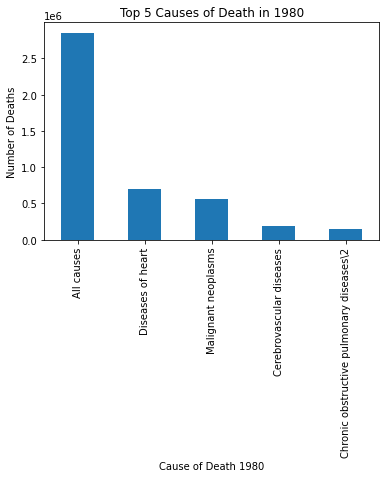

In [12]:
import matplotlib.pyplot as plt

# Example: Plotting the top 5 causes of death in 1980
top_causes_1980 = data.groupby('Cause of Death 1980')['Deaths 2019'].sum().nlargest(5)
top_causes_1980.plot(kind='bar')
plt.title('Top 5 Causes of Death in 1980')
plt.ylabel('Number of Deaths')
plt.show()


## b) Summary Statistics

In [14]:
# Summary statistics for deaths in 1980
print(data['Deaths 2019'].describe())


count    7.700000e+01
mean     6.531522e+04
std      2.574709e+05
min      4.900000e+01
25%      3.810000e+02
50%      3.115000e+03
75%      2.233500e+04
max      2.117332e+06
Name: Deaths 2019, dtype: float64


In [15]:
# Grouping the data by Age Group and calculating the mean number of deaths for each age group
mean_deaths_by_age_group = data.groupby('Age Group')['Deaths 1980', 'Deaths 2019'].mean()

# Displaying the results
print(mean_deaths_by_age_group)


             Deaths 1980    Deaths 2019
Age Group                              
1          116344.714286  106602.571429
2           60883.571429   81944.428571
3           27457.285714   28948.571429
4           11674.142857   24138.714286
5           10425.000000   21972.571429
6            6705.000000   12887.714286
7            5470.857143   11826.285714
8            5002.142857    8797.285714
9            3081.571429    7235.857143
10           2232.714286    6300.428571
Rank       284181.857143  407813.000000


/var/folders/mt/4sh657hn5c187dhp487g4rzw0000gn/T/ipykernel_56413/1370491016.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_deaths_by_age_group = data.groupby('Age Group')['Deaths 1980', 'Deaths 2019'].mean()


### b.1) Descriptive Statistics for Each Age Group

In [18]:
# Group the data by age group and calculate descriptive statistics
descriptive_stats = data.groupby('Age Group')['Deaths 1980', 'Deaths 2019'].describe()

# Display the results
print(descriptive_stats)


          Deaths 1980                                                          \
                count           mean            std     min      25%      50%   
Age Group                                                                       
1                 7.0  116344.714286  217285.974003  3313.0   7222.0  26206.0   
2                 7.0   60883.571429   99673.918196  1026.0   3503.5   6537.0   
3                 7.0   27457.285714   52947.451716   561.0   2781.0   5239.0   
4                 7.0   11674.142857   16267.665346   338.0   1549.0   3648.0   
5                 7.0   10425.000000   15807.259482   319.0    776.5   1572.0   
6                 7.0    6705.000000   10263.146366   194.0    433.5   1497.0   
7                 7.0    5470.857143    9142.566460   142.0    320.5   1166.0   
8                 7.0    5002.142857    9088.607455   104.0    229.0   1058.0   
9                 7.0    3081.571429    4806.160243    84.0    118.0   1012.0   
10                7.0    223

/var/folders/mt/4sh657hn5c187dhp487g4rzw0000gn/T/ipykernel_56413/3545300462.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  descriptive_stats = data.groupby('Age Group')['Deaths 1980', 'Deaths 2019'].describe()


### b.2) Compare Mortality Rates Over Time

In [20]:
# Calculate the change in deaths from 1980 to 2019
data['Change in Deaths'] = data['Deaths 2019'] - data['Deaths 1980']

# Group by age group and calculate mean change
mean_change_by_age = data.groupby('Age Group')['Change in Deaths'].mean()

# Display the results
print(mean_change_by_age)


Age Group
1        -9742.142857
2        21060.857143
3         1491.285714
4        12464.571429
5        11547.571429
6         6182.714286
7         6355.428571
8         3795.142857
9         4154.285714
10        4067.714286
Rank    123631.142857
Name: Change in Deaths, dtype: float64


### b.3) Age Group Specific Trends

In [23]:
# Group by age group and cause of death for each year, and sum the deaths
cause_of_death_trends = data.groupby(['Age Group', 'Cause of Death 1980', 'Cause of Death 2019']).sum()

# Display the results
print(cause_of_death_trends)


                                                                                                                 Deaths 1980  \
Age Group Cause of Death 1980                                Cause of Death 2019                                               
1         Congenital anomalies                               Congenital malformations, deformations and chro...         9220   
          Diseases of heart                                  Diseases of heart                                        595406   
                                                             Malignant neoplasms                                      148322   
          Unintentional injuries                             Unintentional injuries                                    61465   
2         Congenital anomalies                               Congenital malformations, deformations and chro...         1026   
...                                                                                                     

### b.4) Visualization of Trends

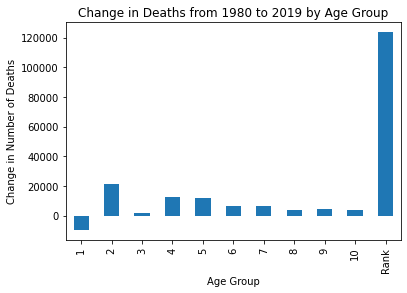

In [24]:
import matplotlib.pyplot as plt

# Plotting the mean change in deaths for each age group
mean_change_by_age.plot(kind='bar')
plt.title('Change in Deaths from 1980 to 2019 by Age Group')
plt.ylabel('Change in Number of Deaths')
plt.xlabel('Age Group')
plt.show()
